## 4-2. 신경망의 구성


### 프로그래밍 환경

딥러닝은 실기 시험 영역에는 포함되어 있지 않습니다.

인공신경망부터 예시들은 Tensorflow 2.X 라이브러리가 추가됩니다.

DS Level 3 에서는 딥러닝은 이론만 시험 범위에 해당 됩니다.

시험에는 Tensorflow를 사용할 상황은 **절대** 없습니다.

Tensorflow로 구성된 실습 예제를 이해할 정도의 내용만 Tensorflow 소개 형식의 가이드만을 남깁니다.

모든 실습 내용은 [Google Colab](https://colab.research.google.com/)에서 작성되었습니다.

자체 tensorflow 라이브러리를 지니고 계신다면, 사용하실 수 있지만, 버젼 차이로 인한 소스의 수정이 필요할 수 있습니다.

Colab에서 실습 내용을 여러 번 실행시키다보면, Colab에서 제공하는 리소스를 초과해서 사용할 수 있습니다.

이 경우 Colab 세션이 강제적으로 재시작 되어 초기화 될 수 있습니다.

이 점을 염두하시길 바랍니다.

### import

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

for i in [pd, np, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

pandas 2.2.3
numpy 2.1.3
sklearn 1.6.1
matplotlib 3.10.1
seaborn 0.13.2


### 예제 데이터셋 준비

In [2]:
# Google Colab 환경과 같은 간이 Notebook 환경을 고려하여 데이터셋을 다운로르 받아 사용합니다.
if not os.path.isfile('data/ratings_100k.csv'):
    if not os.path.isdir('data'):
        !mkdir data
    !pip install gdown
    !gdown 1WfdswkjxOt3QmxxmjryouV0fkD-sGtX3
    !mv ratings_100k.csv data/
    !gdown 17ilbowdshqggVbK4VJwhbdaMLFXPmAtG
    !mv users_100k.csv data/
    !gdown 1SX84B13wp4OFP8W1lPjJNK3NZewEKGg_
    !mv movies_100k.csv data/
    !gdown 1vCq0dxrE8GFxfhFrfy1vLXym3pNyUtGR
    !mv dino_cleaned.csv data/

In [3]:
df_movie = pd.read_csv('data/movies_100k.csv', index_col='movie id')
df_movie.head()

,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df_user = pd.read_csv('data/users_100k.csv', index_col='user id')
df_user.head()

,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [5]:
df_ratings = pd.read_csv('data/ratings_100k.csv')
df_ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
if not os.path.isfile('data/dino_cleaned.csv'):
    !gdown 1uJv-7FG14OkUSq4VBVbZyK0MoPu9ti4e
    !mv dino_cleaned.csv data/
df_dino = pd.read_csv('data/dino_cleaned.csv')
df_dino.head()

,Name,Period,Diet,Country,Name_kr,Continent
0,Aardonyx,Jurassic,herbivore,South Africa,아르도닉스,Africa
1,Abelisaurus,Cretaceous,carnivore,South America,아벨리사우르스,South America
2,Abrictosaurus,Jurassic,herbivore,South Africa,아브릭토사우르스,Africa
3,Abrosaurus,Jurassic,herbivore,China,아브로사우르스,Asia
4,Abydosaurus,Cretaceous,herbivore,North America,아비도사우르스,North America


### Tensorflow 초간단 가이드


#### Tensor란?

n차원 배열 n이 0이면 단일수, n이 1이면 Vector, n이 2이면 Matrix, n이 3이면 Cube, ... 를 통틀어 나타내는 단어 입니다.

머신러닝 관점에서 Tensorflow를 한 마디로, 모수적 모델을 구현하기 위한 라이브러리입니다.


#### Tensorflow의 주요 역할

1. 인공 신경망 모델 구성


2. 학습 및 예측


3. 데이터 셋 구성 및 처리


In [7]:
import os
# 불필요한 경고 메세지가 너무 많이 나와서 내용 파악에 어려움이 있어
# Tensorflow에서 출력하는 경고 메세지를 보이지 않게 조정합니다.
# 개발 단계에서는 비활성화 시키지 않는 것을 권장드립니다.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

# GPU가 있다면, GPU 메모리를 최대한 활용할 수 있도록 설정합니다.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print("{} Physical GPUs, {} Logical GPUs".format(len(gpus), len(logical_gpus)))
    except RuntimeError as e:
        print(e)

2025-11-16 23:24:53.469311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763303093.523369    1208 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763303093.539379    1208 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763303093.653219    1208 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763303093.653256    1208 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1763303093.653256    1208 computation_placer.cc:177] computation placer alr

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1763303096.066118    1208 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


#### Keras

딥러닝 모델을 쉽게 구축하기 위한 딥러닝 프레임워크(Deep learning Framework) 입니다.

Keras는 Tensorflow를 기본 backend로 사용하고 있습니다.


예제에서 사용하는 대부분의 모델링 요소는 Keras를 기반으로 합니다.

Tensorflow에 익숙해지기 위해서 보기의 예를 통해서 설명을 하고, 주석을 통해 기능을 설명합니다.

#### 예제 데이터 생성

퍼셉트론에서 예시를 들었던 1사분면과 3사분면에는 양의 클래스와 2사분면과 4사분면에는 음의 클래스가 분포하는

100개의 레코드로 이루어진 데이터셋을 만듭니다.


이를 분류하는 모델을 만듭니다.


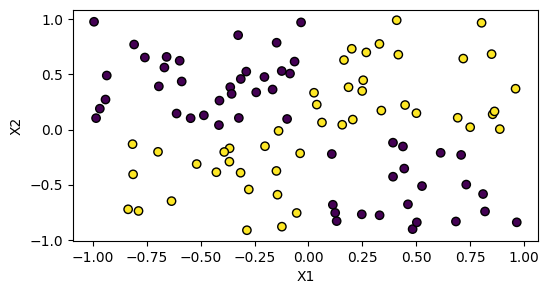

In [8]:
np.random.seed(123)
X_nonlin = np.random.rand(100, 2) * 2 - 1
y_nonlin = (X_nonlin[:, 0] * X_nonlin[:, 1] > 0).astype(int) # 바둑판 모양의 경계면을 지닌 선형 분류가 불가능한 데이터셋을 만듭니다.

plt.figure(figsize=(6, 3))
plt.scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [9]:
# tf.data.Dataset.from_tensor_slices: Numpy, Pandas data 객체를 Tensorflow Dataset으로 만들어 줍니다.
# 1. Tensorflow에 numpy나 DataFrame 직접 전달시 발생하는 Gabage 문제를 회피 가능합니다.
# 2. 데이터를 배치(batch)로 나누고, 섞는shuffle 등의 처리 작업이 용이합니다.
ds_nonlin = tf.data.Dataset.from_tensor_slices(
    (X_nonlin, y_nonlin)
)

#### 모델 생성

**tf.keras.Model**

딥러닝 모델을 구성하고 학습과 예측 기능을 제공해주는 클래스입니다.

모델 구성의 팁: 복잡한 모델을 만들 때, 모델에서 다루는 Tensor의 형태(Shape)를 파악하기 쉽도록 주석으로 달아 줍니다.

이 때, 배열의 첫 번째 차원은 주로 배치(batch) 사이즈를 두고 생각합니다.


**[Ex.1]**

아래 그림과 같은 다층 퍼셉트론 모델을 tf.keras.Model로 만듭니다.

모델의 입력은 배치(batch) 사이즈 만큼의 2차원의 값을 받습니다.

In [10]:
# Tensorflow로 선형회귀 모델(Linear Regression Model)을 정의합니다.
# __init__에서는 모델에서 사용하는 요소들의 인스턴스를 만듭니다.
# call에서는 요소간의 데이터 흐름(호출)관계를 구현합니다.
class BadukModel(tf.keras.Model):
    def __init__(self):
        super().__init__()

        # tf.keras.layers.Dense: 밀도층 만듭니다.
        # 비대칭형 활성화함수로 설정된 층에서 가중치를 초기화할 때 권장하는 초기화 방법 He (Normal 또는 Uniform)을 사용합니다.
        self.hidden_layer1 = tf.keras.layers.Dense(4, # 유닛의 수: 4
            activation='relu', # 활성화 함수: ReLU
            kernel_initializer=tf.keras.initializers.HeNormal() # 가중치 초기화 방법, He Normal(정규분포) 가중치 ~ N(0,  \sqrt(2}/n)
        )
        self.hidden_layer2 = tf.keras.layers.Dense(
            2, activation='relu',
            kernel_initializer=tf.keras.initializers.HeNormal()
        )
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, X, training=False):
        # X:  입력 텐서로 n × 2 차원을 가집니다. n: 배치(batch)의 크기
        X = self.hidden_layer1(X) # 첫번째 은닉층을 통과하면 크기가 n × 4 텐서가 출력됩니다.
        X = self.hidden_layer2(X) # 첫번째 은닉층을 통과하면 크기가  n × 2  텐서가 출력됩니다.
        y_hat = self.output_layer(X) # 출력층을 통과하면 크기가 n × 1 텐서가 출력됩니다.
        return y_hat

#### 학습

Tensorflow은 두 가지 방법의 학습 루틴을 제공합니다.


직접 train loop를 만들어 봅니다. Tensorflow 학습 과정을 직적 살펴 볼수 있고, 나중에 학습 과정에서 특별한 처리가 필요할 때 사용할 수 있습니다.

In [11]:
# Tensorflow의 세션을 초기화 시킵니다.
tf.keras.backend.clear_session()
# 바둑 모델을 생성합니다.
baduk_model = BadukModel()

# 모델의 작동을 확인하기 위해 처음 2개의 입력변수 모델에 전달합니다.
print("입력의 차원: {}".format(X_nonlin[:2].shape))
y_hat = baduk_model(X_nonlin[:2])
print("출력의 차원: {}, 텐서의 내용: {}".format(y_hat.shape, y_hat))

입력의 차원: (2, 2)
출력의 차원: (2, 1), 텐서의 내용: [[0.325163 ]
 [0.2779588]]


In [12]:
# 손실함수를 생성합니다.
# from_logits 는 BinaryCrossentropy에 전달이 되는 것이 로짓(Logit)이면 True 아니면 False 입니다.
# 출력층에 활성화 함수를 sigmoid로 했기 때문에 확률이 출력되므로 False입니다.
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# 옵티마이저(손실함수를 낮추는 가중치(Weight)를 찾아주는 모듈)을 생성합니다.: Adam 최적화기법을 사용합니다
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # 학습율을 0.001으로 설정합니다.
@tf.function
def train_baduk_step(X, y):
    # Tensorflow는 자동 미분(Automatic differentiation) 기능 활용하면, 오류 역전파를 구현하지 않아도 경사도를 구할 수 있습니다.
    # 모델에서 예측값을 구하고, 예측값과 실제값의 손실을 구하는 과정을 tape 객체에 담습니다.
    with tf.GradientTape() as tape:
        y_hat = baduk_model(X)
        loss = bce(y, y_hat)
    # 모델에서 학습 가능한 가중치를 가져옵니다.
    variables = baduk_model.trainable_variables
    # 가중치에 대한 경사도를 구합니다.
    gradients = tape.gradient(loss, variables)
    # 구한 기울기를 가지고 가중치를 업데이트합니다
    optimizer.apply_gradients(zip(gradients, variables))
    # 손실을 반환합니다.
    return loss

In [13]:
losses = []
for epoch in range(300):
    losses_epoch = []
    # tf.dataset.Dataset의 batch 메소드는 배치 사이즈 만큼으로 데이터를 나누어 줍니다,
    for X_, y_ in ds_nonlin.shuffle(100).batch(8):
        losses_epoch.append(train_baduk_step(X_, y_).numpy())
    # epoch 별 손실을 기록합니다.
    losses.append(np.mean(losses_epoch))

I0000 00:00:1763303110.704614    1536 service.cc:152] XLA service 0x7f0bf80017f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763303110.704634    1536 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
I0000 00:00:1763303110.733405    1536 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763303110.933799    1536 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


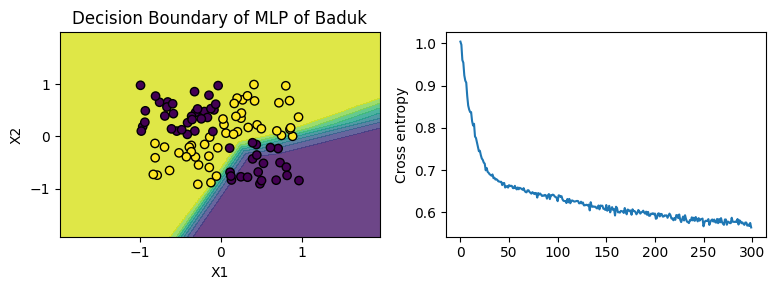

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 결정 공간을 정의합니다.
x_min, x_max = X_nonlin[:, 0].min() - 1, X_nonlin[:, 0].max() + 1
y_min, y_max = X_nonlin[:, 1].min() - 1, X_nonlin[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# 결정 공간에서 학습한 모델의 예측 결과를 만듭니다.
Z = baduk_model.predict(tf.data.Dataset.from_tensor_slices(np.c_[xx.ravel(), yy.ravel()]).batch(128), verbose=0)
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Decision Boundary of MLP of Baduk')

axes[1].plot(losses)
axes[1].set_ylabel('Cross entropy')

plt.tight_layout()
plt.show()

#### 모델 생성과 학습 간소화

tf.keras.Model을 상속을 받아 만들었지만,

tf.keras.models.Sequential을 사용하면 직렬 구조의 신경망 모델을 보다 쉽게 만들 수 있습니다.

In [16]:
# Tensorflow의 세션을 초기화 시킵니다.
tf.keras.backend.clear_session()

baduk_seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()), # 첫번째 은닉층
    tf.keras.layers.Dense(2, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal()), # 두번째 은닉층
    tf.keras.layers.Dense(1, activation='sigmoid') #  출력층
])

- 학습 함수와 루프로 모델을 학습시켰지만, tf.keras.Model의 compile ~ fit으로 학습 과정을 간단히 해봅니다.

In [17]:
# compile: 학습에 필요한 설정을 전달하면, 학습에 필요한 리소스를 생성합니다.
baduk_seq_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)
train_hist = baduk_seq_model.fit(ds_nonlin.shuffle(100).batch(8),epochs=300, verbose=0)

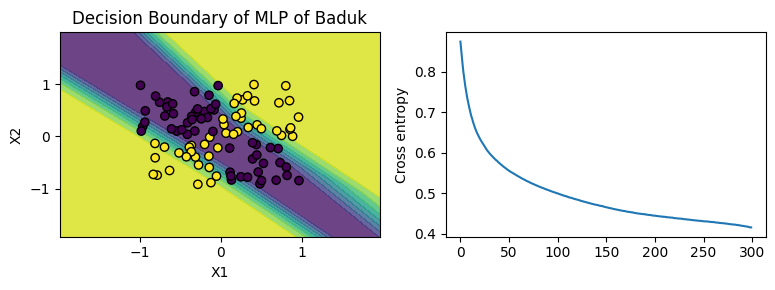

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# 결정 공간을 정의합니다.
x_min, x_max = X_nonlin[:, 0].min() - 1, X_nonlin[:, 0].max() + 1
y_min, y_max = X_nonlin[:, 1].min() - 1, X_nonlin[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
# 결정 공간에서 학습한 모델의 예측 결과를 만듭니다.
Z = baduk_seq_model.predict(tf.data.Dataset.from_tensor_slices(np.c_[xx.ravel(), yy.ravel()]).batch(64), verbose=0)
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.8)
axes[0].scatter(X_nonlin[:, 0], X_nonlin[:, 1], c=y_nonlin, marker='o', edgecolors='k')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].set_title('Decision Boundary of MLP of Baduk')

axes[1].plot(train_hist.history['loss'])
axes[1].set_ylabel('Cross entropy')

plt.tight_layout()
plt.show()

In [19]:
# 신경망 각층의 출력 형태와 모수의 크기를 보여줍니다.
baduk_seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77 (312.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 52 (212.00 B)

In [20]:
# 각 층의 모수의 내용을 출력해 봅니다.
for i, title in zip(baduk_seq_model.layers, ['첫번째 은닉층', '두번째 은닉층', '출력층']):
    print(title)
    print('가중치 행렬 크기:{}'.format(i.get_weights()[0].shape))
    print('가중치 행렬 내용: {}'.format(i.get_weights()[0]))
    print('절편의 크기: {}'.format(i.get_weights()[1].shape))
    print('절편의 내용: {}'.format(i.get_weights()[1]))

첫번째 은닉층
가중치 행렬 크기:(2, 4)
가중치 행렬 내용: [[ 1.3503537   1.4763399  -0.6325908  -1.2937546 ]
 [ 0.93565184 -0.36015302 -0.7131308  -1.3574765 ]]
절편의 크기: (4,)
절편의 내용: [-0.16564782 -0.29141113 -0.24823481 -0.32223022]
두번째 은닉층
가중치 행렬 크기:(4, 2)
가중치 행렬 내용: [[ 2.1417353   1.1166875 ]
 [-0.2056091  -0.49625638]
 [ 1.7669622  -0.17566389]
 [ 1.7432472  -0.37826973]]
절편의 크기: (2,)
절편의 내용: [-0.5278749  -0.00063992]
출력층
가중치 행렬 크기:(2, 1)
가중치 행렬 내용: [[1.8176016]
 [1.8048778]]
절편의 크기: (1,)
절편의 내용: [-1.3105341]


###  1. 밀도 레이어(Dense Layer)
#### 밀도 레이어(Dense Layer)의 구성
- 완전 연결층(Fully Connected Layer): 레이어의 입력이 현재 레이어의 모든 뉴런과 완전히 연결
- 구성 및 연산
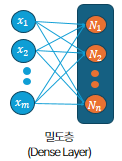

> 입력(x, m): 이전 레이어 벡터
>
> 뉴런의 수(n): 레이어 출력 수
> 파라미터 구성
>    가중치 행렬(W, n×m): 레이어 출력 수
> 
>    편향 벡터(b,n): 레이어 출력 수
> 
>    활성화 함수: f(x)
> 
> 연산: $𝐲=𝑓(𝑊𝐱+𝐛)$
>
> $\mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix}$
>
> $\mathbf{W} = \begin{pmatrix} w_{11} & w_{12} & \cdots & w_{1m} \\ w_{21} & w_{22} & \cdots & w_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ w_{n1} & w_{n2} & \cdots & w_{nm} \end{pmatrix}$ $b = \begin{pmatrix} b_1 \\ b_2 \\ \vdots \\ b_n \end{pmatrix}$

#### 밀도 레이어의 특징
- 특징 표현 능력: 충분한 수의 뉴런 층이 있으면 복잡한 특징 표현 가능
- 파라미터 수: m(입력 수) × n(뉴런 수) + n
- 활용
> 다층 퍼셉트론의 핵심 구성 요소
> 특징 추출 후 최종 출력 네트워크 구성

### 2. 신경망의 구성

#### 밀도 레이어(Dense Layer)의 한계

- 공간적, 시각적 정보 손실
- 특성이 늘어날수록 파라미터 폭증
> 특성의 성격에 맞게 네트워크 구성 효율화
> 신경망의 심층화: 계층적 구조를 통한 특성 추상화

### 3. 임베딩 레이어(Embedding Layer)

#### 범주형 데이터를 연속적인 실수 벡터 공간으로 매핑
- 구성 및 연산
- 입력(m): 범주형 데이터 에서 범 주의 정수 인덱스 (Ex: 사과→1, 배 →2, …, Unknown →0)
- 임베딩 크기(n): 범주를 표현할 벡터의 크기
- 범주 수(k): 범주형 데이터에서 범주의 개수
- 출력: m×n

- 파라미터 구성
> 임베 딩 테이블(k × n): 각 범주값의 의미를 나타내는 벡터의 집합
> 
> 연산: 입력이 나타내는 위치의 벡터 반환

#### 임베딩 레이어의 특징

- 의미적 관계 학습: 역전파에 의해 데이터에 나타난 범주의 특징 기록
> 추상적인 개념이나 관계를 수치적으로 표현
- 희소성 문제 해결
> 높은 가짓수 를 가진 범주형 변수의 가변수 처리에 의한 고차원 희소벡터의 비효율 해결
> 
> 일반화 능력 향상 및 과적합 방지

- 활용
> 단어, 사용자 ID, 상품 등 비교적 높은 가짓수를 가진 범주형 데이터 표현
- 문제점
> 새로 등장한 범주나 등장 빈도가 적은 범주에 대해서는 낮은 성능
> 
> 최적의 임베딩 크기 결정 필요

### 4. 합성곱 레이어(Convolution Layer)
#### 지역적(위치 기반) 패턴의 효과적 추출 및 표현
- 필터를 입력 데이터 전체에 걸쳐 이동시키며 합성곱으로 영역의 특징을 추출하는 연산
- 구성 및 연산
> 채널(channel): 위치의 특 징을 공유하는 데이터 단위
> 
> $C_{in}$: 입력 채널 수  $C_{out}$: 출력 채널 수
>
> 입력($W \times C_{in}, W \times H \times C_{in}$, ...): 텐서 의 인덱스가 위치와 채널을 나타내는 데이터
>
> 커널/필터($M, M \times N$, …): 지역적 패턴을 나타 내는 가중치 텐서
>
> 패딩(Padding, P): 가장 자리에 0 을 추가해 출력 크기 조절
> 
> 스트라이드(S): 필터가 한 번에 이동하는 거리
>
> 편향(b): 합성곱 연산의 편향값으로, 출력 채널수만큼 있음
> 
> 출력 크기: $O = \left\lfloor \frac{I - K + 2P}{S} \right\rfloor + 1$


- 합성곱

> 입력 크기: 5×5, 커널 크기: 3×3, 패딩: 1, 스트라이드: 2, 편향: b=1
>
> 파라미터의 구성: 커널 행렬($K, M \times N$): $3 \times 3 = 9$, 편향: 1

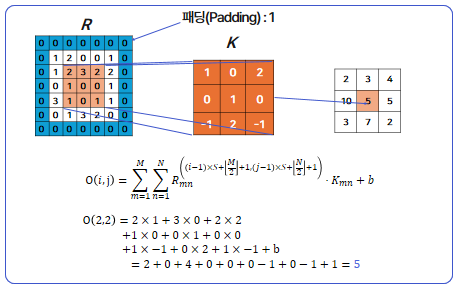

- 다채널 합성곱

> 채널(channel): $C_{in}$: 3, $C_{out}$: 4
>
> 입력 크기: 5×5x3, 커널 크기: 3×3, 패딩: 1, 스트라이드: 2, 편향: 3x4, 출력: 5x5x4
>
> 파라미터의 구성: 커널 행렬($K, M \times N \times C_{in} \times C_{out}$): $3 \times 3 \times 3 \times 4= 108$, 편향($C_{out}$): 4

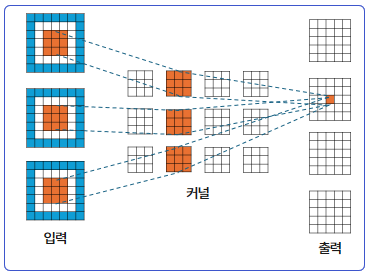

**[Ex.1]**

Tensorflow에 내장된 MNIST 데이터셋을 활용합니다.  

MNIST 데이터는 0에서 9사이의 숫자에 대한 손글씨를 28×28 사이즈의 흑백 이미지로 담은 데이터입니다.

이 데이터셋은 학습데이터와 평가데이터가 이미 나누어진 상태로 제공됩니다. 학습데이터는 총 60,000개, 평가데이터는 10,000로 구성되었습니다.

학습데이터 중에서 20%는 검증 데이터로 구성을 합니다.  28×28 흑백 이미지로 된  0~9까지의 숫자 손글씨를 인식하는  인공신경망 모델을 아래 제시된 구조로 만듭어 학습해봅니다.

손실함수는 크로스엔트로피를 사용합니다.

In [21]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
idx = int(X_train.shape[0] * 0.2)
X_val, y_val = X_train[:idx], y_train[:idx]
X_train, y_train = X_train[idx:], y_train[idx:]

# Tensorflow 데이터셋을 만들어 줍니다.
# 이 과정에서 reshape을 통해 채널을 나타내는 배열의 차원을 추가합니다.
# 그리고 스캐일을 0과 1사이로 조정하기 위해 255로 나누어 줍니다.
ds_mnist_train = tf.data.Dataset.from_tensor_slices(
    (X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_train)
)
ds_mnist_val = tf.data.Dataset.from_tensor_slices(
    (X_val.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_val)
)
ds_mnist_test = tf.data.Dataset.from_tensor_slices(
    (X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0, y_test)
)
X_train.shape, X_val.shape, X_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

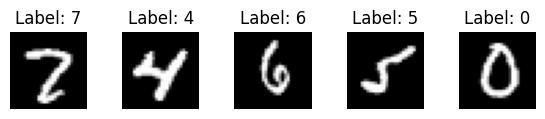

In [22]:
ds_mnist_train.take(1)
# 학습 데이터셋에서 이미지 출력합니다.
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(7, 1))

for i in range(num_images):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.show()

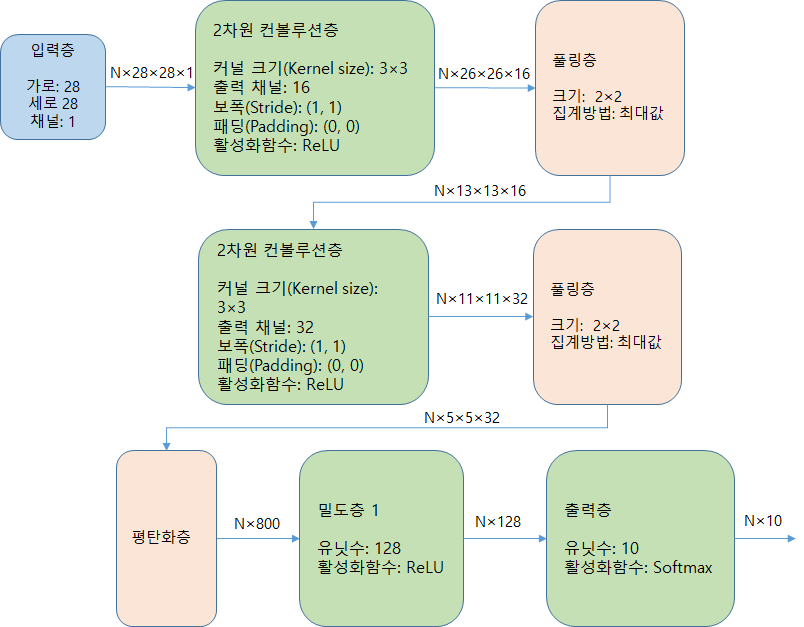

In [23]:
tf.keras.backend.clear_session()
# tf.keras.layers.Conv2D: filters: 출력채널수, kernel_size: 필터 크기, padding: valid = no padding, 'same' = 출력의 크기가 동일토록 설정
# tf.keras.layers.MaxPooling2D: pool_size-풀링 연산에 사용될 입력크기
# tf.keras.layers.Flatten: 입력의 크기를 1차원(배치(Batch) 제외)으로 평탄화
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),  # 1차원으로 펼칩니다.
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# tf.keras.losses.SparseCategoricalCrossentropy - 대상 변수가 Sparse(레이블 인코딩 되어 0시작하는 클래스 번호로 된 형태)일 때의 CrossEntorpy 손실을 나타냅니다.
# from_logits: 손실함수 입력의 Logit 여부
mnist_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # softmax로 출력이 되도록 했으므로 from_logits=False입니다.
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ['accuracy']
)

train_mnist_hist = mnist_model.fit(ds_mnist_train.batch(64), validation_data=ds_mnist_val.batch(64), epochs=10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9311 - loss: 0.2299 - val_accuracy: 0.9652 - val_loss: 0.1119
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9788 - loss: 0.0722 - val_accuracy: 0.9778 - val_loss: 0.0716
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9821 - val_loss: 0.0579
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9891 - loss: 0.0380 - val_accuracy: 0.9854 - val_loss: 0.0498
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0294 - val_accuracy: 0.9867 - val_loss: 0.0451
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9936 - loss: 0.0228 - val_accuracy: 0.9884 - val_loss: 0.0418
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9952 - loss: 0.0177 - val_accuracy: 0.9876 - val_loss: 0.0425
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9966 - loss: 0.0138 - val_accuracy: 0.

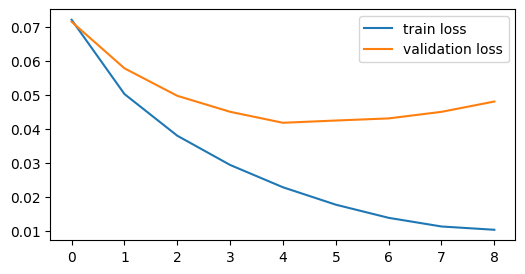

In [24]:
plt.figure(figsize=(6, 3))
plt.plot(train_mnist_hist.history['loss'][1:], label='train loss')
plt.plot(train_mnist_hist.history['val_loss'][1:], label='validation loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
y_prd = mnist_model.predict(ds_mnist_test.batch(64))
mnist_test_acc = accuracy_score(y_test, np.argmax(y_prd, axis=1))
mnist_test_acc

157/157 ━━━━━━━━━━━━━━━━━━━━ -29s -186028us/step


0.9858

In [26]:
# 가중치의 수를 확인합니다.
mnist_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 325,856 (1.24 MB)

 Trainable params: 108,618 (424.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 217,238 (848.59 KB)

첫 번쨰 컨볼루션층의 가중치 수: 1 × 16 × 3 × 3 + 16 = 144 + 16 = 160, 입력채널수 × 출력채널수 × 커널의 가로 크기 × 커널 세로 크기 + 출력 채널수

두 번쨰 컨볼루션층의 가중치 수: 16 × 32 × 3 × 3 + 32 = 4608 + 32 = 4640

첫 번째 밀도층의 가중치 수: 800 × 128 + 128 = 102400 + 128 = 102528

두 번째 밀도층의 가중치 수: 128 × 10 + 10 = 1280 + 10 = 1290

In [27]:
from keras.utils import plot_model
plot_model(mnist_model, rankdir='LR', dpi=72, show_shapes=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


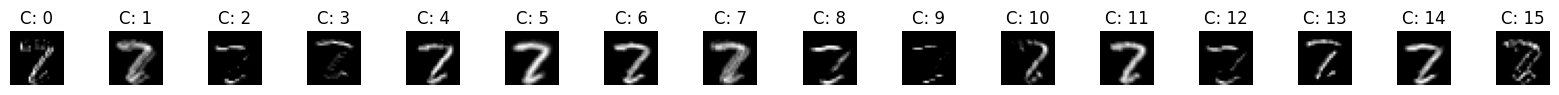

In [28]:
# 첫번째 컨볼루션층을 통했을 때의 출력입니다. 위 이미지 중에 첫번째(숫자 7)
num_images = 16
fig, axes = plt.subplots(1, num_images, figsize=(16, 1))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32')).numpy()
for i, ax in zip(range(num_images), axes):
    ax.imshow(output_layer1[0, :, :, i].reshape(26, 26), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

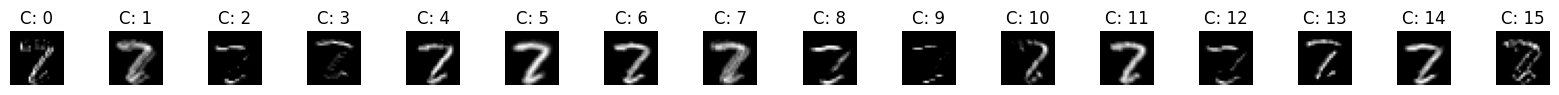

In [29]:
# 첫번째 컨볼루션층을 통했을 때의 출력입니다. 위 이미지 중에 첫번째(숫자 7)
num_images = 16
fig, axes = plt.subplots(1, num_images, figsize=(16, 1))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32')).numpy()
for i, ax in zip(range(num_images), axes):
    ax.imshow(output_layer1[0, :, :, i].reshape(26, 26), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')

plt.tight_layout()
plt.show()

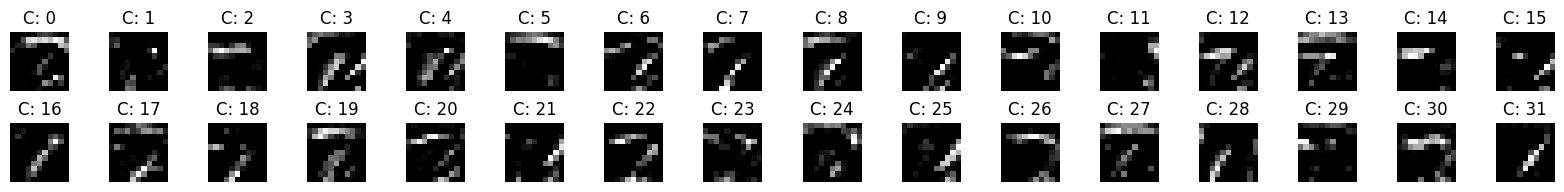

In [30]:
# 두번째 컨볼루션층을 통했을 때의 출력입니다.
num_images = 32
fig, axes = plt.subplots(2, num_images // 2, figsize=(16, 2))
output_layer1 = mnist_model.layers[0](np.expand_dims(X_train[:1], axis=-1).astype('float32'))
output_layer2 = mnist_model.layers[2](mnist_model.layers[1](output_layer1)).numpy()
for i, ax in zip(range(num_images), axes.ravel()):
    ax.imshow(output_layer2[0, :, :, i].reshape(11, 11), cmap='gray')
    ax.set_title('C: {}'.format(i))
    ax.axis('off')
plt.tight_layout()
plt.show()

### 5. 순환 신경망(Recurrent Neural Network)
#### 시퀀스 데이터를 효율적으로 처리하기 위한, 순환 구조의 신경망
- 순환 구조 vs 비순환 구조

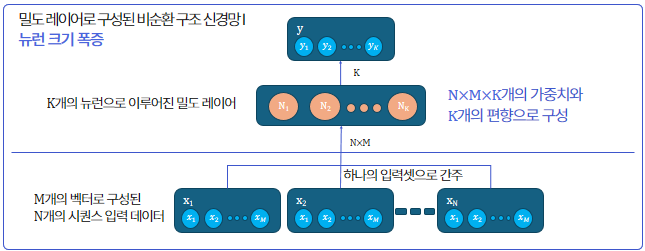

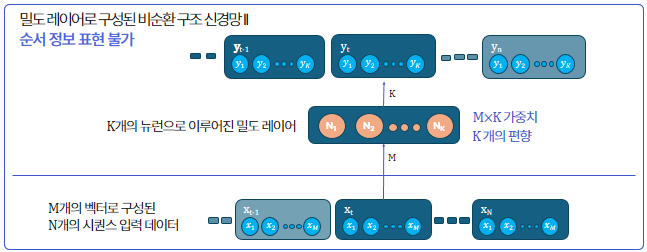

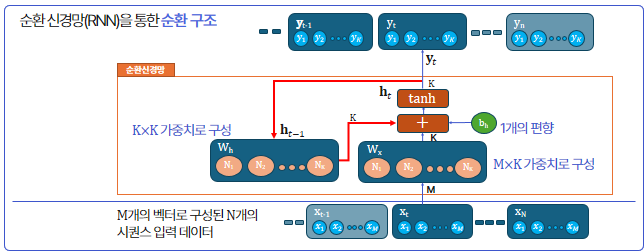

- 연산: $𝐲_𝑡=𝐡_𝑡=tanh(𝑊_{𝐱𝐱}𝑡+𝑊_{𝐡}𝐡_{𝑡−1}+𝑏_h)$

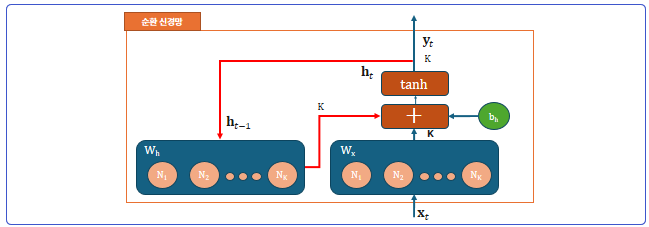

#### RNN 의 문제점
- 기울기 소실(Vanishing Gradient): 역전파 시 작은 값이 존재할 경우 기울기 소실

- 기울기 폭증(Vanishing Exploding): 역전파 시 큰 값이 존재할 경우 기울기 폭증 및 학습 불안정

> $\Rightarrow$ LSTM(Long Short-Term Memory), GRU(Gated Recurrent Unit)와 같은 게이트 구조 도입

#### LSTM(Long Short-Term Memory): 게이트(Gate)를 통해 중요한 정보는 기억하고 불필요한 정보는 버림

- 입력 게이트(Input Gate): 기억 영역에 반영할 정도 조절
- 망각 게이트(Forget Gate): 이전 정보 기억 여부 조절
- 출력 게이트(Output Gate): 은닉 상태에 얼마나 반영할지 조절
- 순환 신경망(Recurrent Neural Network)
- 셀 상태(Cell Status): 장기 메모리 역할

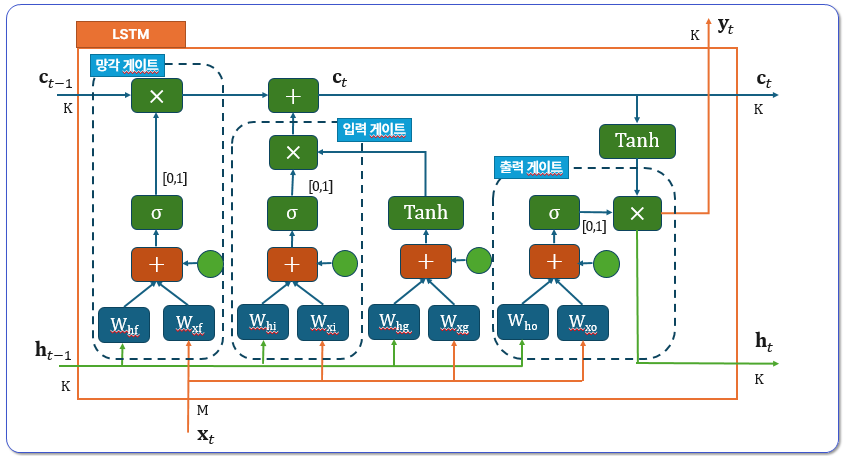

#### GRU(Gated Recurrent Unit): LSTM 보다 간단한 구조로, 계산량을 줄임
- 갱신 게이트(Update Gate): 새 정보 반영과 이전 상태 유지 조절
- 초기화 게이트(Reset Gate): 이전 상태의 유지와 갱신 정도 조절

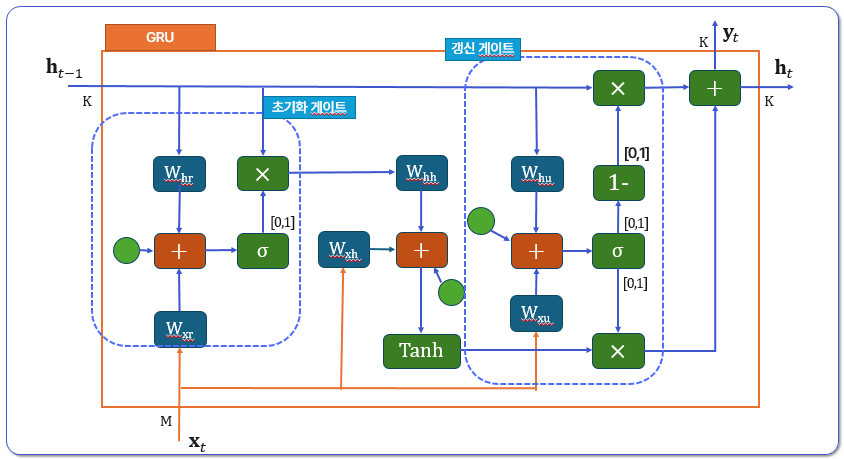

#### 시퀀스 모델링 유형
- 시퀀스 축으로 펼친(Unrolled) 구조도

| 활성화 함수 | N:1 구조<br/>(Many-to-One) | 1:N 구조<br/>(One-to-Many) |
| --- | --- | --- |
| 구조 |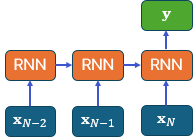|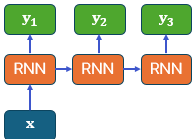|
| 사용 사례 | 감성 분석 | 이미지 캡셔닝 |


| 활성화 함수 | 1:1 대응 구조<br/>(One-per-One) | M:N 구조<br/>(Many-to-Many) |
| --- | --- | --- |
| 구조 |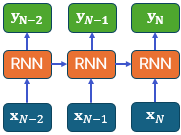|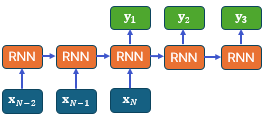|
| 사용 사례 | 비디오 캡셔닝 | 기계 번역 |



**[Ex.2]**

df_dino에서 공룡의 Name에 규칙성을 가지고 육식공룡(carnivore) 초식공룡(herbivore)를 구분하는 모델을 만들고자 합니다.

이를 위해 철자별로 입력을 받아(Name_idx) 사용하여 공룡의 식성을 육식/초식으로 분류하는  모델을 맞추는 모델을 만들어 봅니다.

이를 위해 many-to-one 시퀀스 형태를 지닌 순환신경망을 사용합니다.

df_dino에서 Diet가 herbivore, carnivore인 경우 만을 뽑아 Diet가 carnivore이면


In [31]:
df_dino['Name'].apply(lambda x: x).head()

0         Aardonyx
1      Abelisaurus
2    Abrictosaurus
3       Abrosaurus
4      Abydosaurus
Name: Name, dtype: object

In [32]:
# 철자들을 분해하여, Integer로 된 숫자 인덱스 형식으로 만들어, 입력 데이터로 만들어 줍니다.

df_dino['Name_idx'] = df_dino['Name'].str.lower().str.strip().apply(lambda x: list(x)) # 이름을 철자별로 분해합니다.
PAD, BOS, EOS = 0, 1, 2 # 여백, 단어시작, 단어끝 인덱스를 정의합니다.
max_name = df_dino['Name_idx'].apply(lambda x: len(x)).max() + 2 # 입력의 수 =  이름의 최대 길이 + 2
chars = np.sort(df_dino['Name_idx'].explode().unique()) # 등장한 문자들을 구합니다.

char_to_idx = {c : (i + 3) for i, c in enumerate(chars)} # 문자를 숫자로 변환 시키는 mapping
idx_to_char = {(i + 3) : c for i, c in enumerate(chars)} # 숫자를 물자로 변환 시키는 mapping

# 알파벳으로된 철자 리스트를 시작은 BOS 끝은 EOS 그리고 여백은 PAD가 들어가도록 인코딩을 시켜줍니다.
df_dino['Name_idx'] = df_dino['Name'].str.lower().str.strip().apply(lambda x: [BOS] + [char_to_idx[i] for i in x] + [EOS] + [PAD] * (max_name - len(x)))
df_dino['Name_idx'].head()

0    [1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...
1    [1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...
2    [1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...
3    [1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...
4    [1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...
Name: Name_idx, dtype: object

In [33]:
df_dino['Diet'].value_counts()

Diet
herbivore    731
carnivore    354
omnivore      56
unknown       11
Name: count, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
df_dino_diet = df_dino[df_dino['Diet'].isin(['herbivore', 'carnivore'])].assign(
    label = lambda x: (x['Diet'] == 'carnivore').astype('int')
)[['Name_idx', 'label']].rename(columns={'Name_idx': 'input'})
df_dino_diet.head()

,input,label
0,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...",0
1,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...",1
2,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...",0
3,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...",0
4,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...",0


In [35]:
df_dino.head()

,Name,Period,Diet,Country,Name_kr,Continent,Name_idx
0,Aardonyx,Jurassic,herbivore,South Africa,아르도닉스,Africa,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0..."
1,Abelisaurus,Cretaceous,carnivore,South America,아벨리사우르스,South America,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,..."
2,Abrictosaurus,Jurassic,herbivore,South Africa,아브릭토사우르스,Africa,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23..."
3,Abrosaurus,Jurassic,herbivore,China,아브로사우르스,Asia,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,..."
4,Abydosaurus,Cretaceous,herbivore,North America,아비도사우르스,North America,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,..."


In [36]:
from sklearn.model_selection import train_test_split
df_dino_diet_train, df_dino_diet_test = train_test_split(df_dino_diet, train_size = 0.8, stratify=df_dino_diet['label'], random_state=123)

df_dino_diet_train, df_dino_diet_val = train_test_split(df_dino_diet_train, train_size = 0.8, stratify=df_dino_diet_train['label'], random_state=123)

ds_dino_diet_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_train['input'].values), df_dino_diet_train['label'].values)
)
ds_dino_diet_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_val['input'].values), df_dino_diet_val['label'].values)
)

ds_dino_diet_test = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_diet_test['input'].values), df_dino_diet_test['label'].values)
)

In [37]:
tf.keras.backend.clear_session()
dino_diet_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [38]:
dino_diet_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)
train_hist = dino_diet_model.fit(
    ds_dino_diet_train.shuffle(1000).batch(32), validation_data=ds_dino_diet_val.batch(128),
    epochs=500,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10), # 총 10 epochs 동안 개선이 없으면 종료합니다.
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=0, min_lr=1e-6) # 5 epochs 동안 개선이 없으면 학습률을 현재 학습율에서 0.1배 만큼 낮춥니다.
    ], verbose=0
)

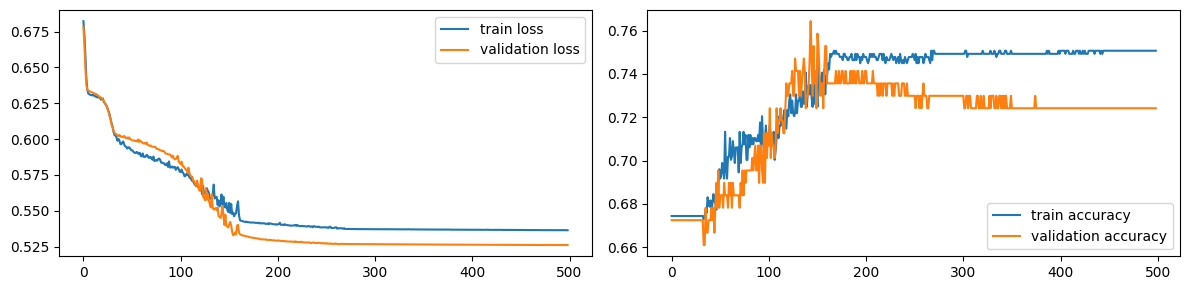

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(train_hist.history['loss'][1:], label='train loss')
axes[0].plot(train_hist.history['val_loss'][1:], label='validation loss')
axes[0].legend()

axes[1].plot(train_hist.history['accuracy'][1:], label='train accuracy')
axes[1].plot(train_hist.history['val_accuracy'][1:], label='validation accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(
    df_dino_diet_test['label'],
    tf.squeeze(dino_diet_model.predict(ds_dino_diet_test.batch(128))) > 0.5
)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


0.7050691244239631

In [41]:
df_dino_diet_test['label'].value_counts(normalize=True)

label
0    0.672811
1    0.327189
Name: proportion, dtype: float64

**[Ex.3]**

Many-to-Many I 구조를 갖습니다.

공룡이름의 앞의 몇 글자를 주면 이후의 공룡 이름을 완성시켜주는 생성형 모델을 만듭니다.

학습시 입력은 공룡의 이름의 철자별로 넣어주고, 출력은 다음 글자로 구성합니다.

즉 이전 글자를 넣으면, 다음 글자를 맞추도록하는 모델을 만들어봅니다.

이러한 구성은 Teacher's forcing 이라는 기법으로 학습을 좀 더 원활하게 해줍니다.

예측시에, 이전의 출력을 현재 입력에 넣어 다음 글자를 예측하여 이름을 완성시켜갑니다.


In [42]:
df_dino_name_gen = pd.concat([
    df_dino['Name_idx'].apply(lambda x: x[:-1]).rename('input'),
    df_dino['Name_idx'].apply(lambda x: x[1:]).rename('target')
], axis=1)
df_dino_name_gen.head()

,input,target
0,"[1, 3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0...","[3, 3, 20, 6, 17, 16, 27, 26, 2, 0, 0, 0, 0, 0..."
1,"[1, 3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2,...","[3, 4, 7, 14, 11, 21, 3, 23, 20, 23, 21, 2, 0,..."
2,"[1, 3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23...","[3, 4, 20, 11, 5, 22, 17, 21, 3, 23, 20, 23, 2..."
3,"[1, 3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0,...","[3, 4, 20, 17, 21, 3, 23, 20, 23, 21, 2, 0, 0,..."
4,"[1, 3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2,...","[3, 4, 27, 6, 17, 21, 3, 23, 20, 23, 21, 2, 0,..."


In [43]:
from sklearn.model_selection import train_test_split
df_dino_name_gen_train, df_dino_name_gen_val = train_test_split(df_dino_name_gen, train_size = 0.9)

ds_dino_name_gen_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_train['input'].values), np.vstack(df_dino_name_gen_train['target'].values))
)
ds_dino_name_gen_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_val['input'].values), np.vstack(df_dino_name_gen_val['target'].values))
)

In [44]:
from sklearn.model_selection import train_test_split
df_dino_name_gen_train, df_dino_name_gen_val = train_test_split(df_dino_name_gen, train_size = 0.9)

ds_dino_name_gen_train = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_train['input'].values), np.vstack(df_dino_name_gen_train['target'].values))
)
ds_dino_name_gen_val = tf.data.Dataset.from_tensor_slices(
    (np.vstack(df_dino_name_gen_val['input'].values), np.vstack(df_dino_name_gen_val['target'].values))
)

In [45]:
tf.keras.backend.clear_session()
dino_name_gen_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(char_to_idx) + 3),
    tf.keras.layers.Softmax(),
])

In [46]:
dino_name_gen_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
train_gen_hist = dino_name_gen_model.fit(
    ds_dino_name_gen_train.shuffle(1000).batch(64), validation_data=ds_dino_name_gen_val.batch(128),
    epochs=500,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20, min_delta=0, min_lr=1e-6)
    ], verbose=0
)

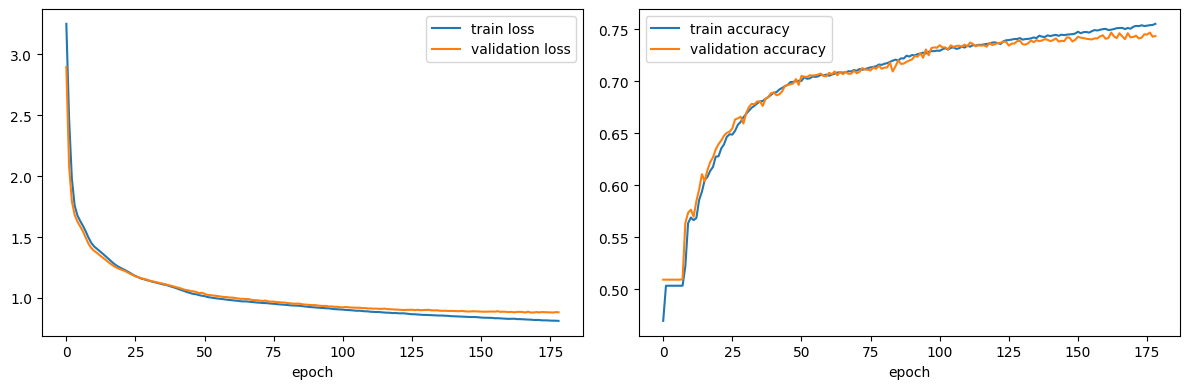

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(train_gen_hist.history['loss'], label='train loss')
axes[0].plot(train_gen_hist.history['val_loss'], label='validation loss')
axes[0].set_xlabel('epoch')
axes[0].legend()

axes[1].plot(train_gen_hist.history['accuracy'], label='train accuracy')
axes[1].plot(train_gen_hist.history['val_accuracy'], label='validation accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend()

plt.tight_layout()
plt.show()

In [49]:
dino_name_gen_model_prd = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, ), batch_size=1),
    tf.keras.layers.Embedding(len(char_to_idx) + 3, 16),
    tf.keras.layers.LSTM(32, return_sequences=True, stateful=True,),
    tf.keras.layers.LSTM(32, return_sequences=True, stateful=True,),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(char_to_idx) + 3),
    tf.keras.layers.Softmax(),
])

In [50]:
dino_name_gen_model_prd.build((1, 1))
for i in [0, 1, 2, 3, 4, 5]:
    dino_name_gen_model_prd.layers[i].set_weights(dino_name_gen_model.layers[i].get_weights())

In [52]:
prefix_str = 'ty'
temperature = 0.1
prefix = [BOS] + [char_to_idx[i] for i in list((prefix_str.lower()))]
for i in prefix:
    char_idx = tf.squeeze(tf.argmax(dino_name_gen_model_prd(tf.constant([[i]])), axis=-1)).numpy()
gen_name = [idx_to_char[char_idx]]
for i in range(max_name + 3):
    char_idx = tf.squeeze(tf.argmax(dino_name_gen_model_prd(tf.constant([char_idx])), axis=-1)).numpy()
    if char_idx not in idx_to_char:
        break
    gen_name.append(idx_to_char[char_idx])
print(prefix_str + ' ' + ''.join(gen_name))

ty nastetosaurus


### 6. 드롭 아웃(Drop-out)
#### 학습 중 무작위로 일부 뉴런을 제외(Drop)하여 과적합에 대응

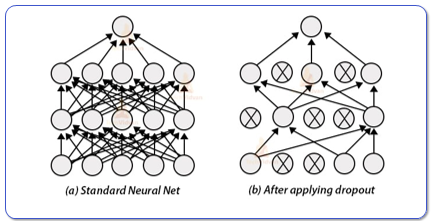

- 일부 뉴런에 지나치게 의존하지 않게 학습
- 앙상블 효과: 서로 다른 서브 네트워크를 무작위로 학습하는 효과
- 드롭 아웃 비율(Drop-Out Rate): 뉴런이 제외될 확률


**[Ex.7]**

[Ex.4] mnist 손글씨 데이터셋으로 만든 모델에 첫번째 컨볼루션층 다음에 드롭아웃층(Dropout)을 드롭율을 0.3으로 설정하여 추가하고,

두번째 컨볼루션층 다음에 드롭아웃층을 드롭율을 0.3으로 설정하여 추가합니다.

이전과 이후의 학습 추이를 시각화하고 평가셋의 성능을 비교합니다.

In [53]:
tf.keras.backend.clear_session()

mnist_model_do = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),  # 1차원으로 펼칩니다.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
mnist_model_do.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
    metrics = ['accuracy']
)

train_mnist_hist_do = mnist_model_do.fit(ds_mnist_train.batch(64), validation_data=ds_mnist_val.batch(64), epochs=10)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9065 - loss: 0.3196 - val_accuracy: 0.9510 - val_loss: 0.1942
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9686 - loss: 0.1016 - val_accuracy: 0.9747 - val_loss: 0.1144
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9770 - loss: 0.0734 - val_accuracy: 0.9741 - val_loss: 0.1048
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0593 - val_accuracy: 0.9833 - val_loss: 0.0713
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9854 - val_loss: 0.0616
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9869 - loss: 0.0408 - val_accuracy: 0.9864 - val_loss: 0.0577
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9886 - loss: 0.0368 - val_accuracy: 0.9887 - val_loss: 0.0537
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9894 - loss: 0.0318 - val_accuracy: 0.

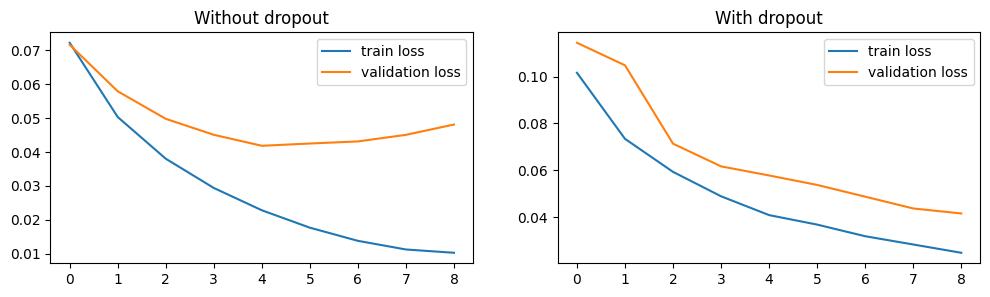

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(train_mnist_hist.history['loss'][1:], label='train loss')
axes[0].plot(train_mnist_hist.history['val_loss'][1:], label='validation loss')
axes[0].set_title('Without dropout')
axes[0].legend()

axes[1].plot(train_mnist_hist_do.history['loss'][1:], label='train loss')
axes[1].plot(train_mnist_hist_do.history['val_loss'][1:], label='validation loss')
axes[1].set_title('With dropout')
axes[1].legend()
plt.show()

In [55]:
y_prd = mnist_model_do.predict(ds_mnist_test.batch(64))
mnist_test_acc_do = accuracy_score(y_test, np.argmax(y_prd, axis=1))
mnist_test_acc, mnist_test_acc_do

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s -189697us/step


(0.9858, 0.9898)

### 7. 풀링(Pooling)
#### 영역별 대표값(최대값, 평균,...)을 추출하여 압축
- 공간 차원 축소: 연산량 감소, 메모리 절약
- 강인함(Robustness) 확보
- 계층적 표현 강화
- 정보 손실에 유의


- 구성 및 연산
> 윈도우 사이즈(W): 단위 영역의 크기, 전역 풀링(Global Pooling)일 경우 채널 전체가 단위 영역이 됨
> 
> 스트라이드(Stride, S): 윈도우 이동 간격
> 
> 패딩(Padding, P): 가장자리에 0을 추가해 출력 크기 조절
> 
> 출력 크기: $O = \lfloor \frac{I - K + 2P}{S} \rfloor + 1$



- 구성 및 연산
> 최대 풀링(Max Pooling)
> 
> $output(i, j) = \max_{(m,n) \in window} x(i + m, j + n)$
> 
> 평균 풀링(Average Pooling)
>
> $output(i, j) = \frac{1}{|window|} \sum_{(m,n) \in window} x(i + m, j + n)$

#### 정리

- 핵심 레이어

| 구분 | 개념 | 주요 활용 분야 |
| --- | --- | --- |
| 밀도 레이어 | 모든 뉴런이 레이어의 입력과 모두 연결된 형태 | 다층 퍼셉트론<br/>신경망 상층에서 정보 종합 |
| 임베딩 레이어 | 범주형 데이터(특히 높은 가짓수)를 연속적인 벡터로 매핑 | 자연어 처리, 추천 시스템, … |
| 합성곱 레이어 | 필터/커널을 통해 지역(위치)의 구조 표현 | 이미지 처리, 영상 분석, 음성 인식, 신호 분석 |
| 순환 신경망 | 시퀀스(순서 기반) 데이터의 순서상 관계 표현 | 자연어 처리, 시계열 예측 |


- 보조 레이어

| 구분 | 역할 |
| --- | --- |
| 드롭 아웃 | 학습 중 일부 뉴런을 드롭(Drop)시켜 과적합 방지 |
| 풀링 | 공간적(지역적) 정보를 요약하여 계산량 감소 및 과적합 방지 |
